In [1]:
# Importing essential libraries for data analysis, visualization, modeling, and evaluation

# Core libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations

# Visualization
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns            # Enhanced statistical plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)  # Set Seaborn style for consistency

# Model persistence and config handling
import joblib  # Saving/loading models
import json    # Handling configuration or metadata

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Encoding categorical variables

# Model selection and tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV  # Splitting and hyperparameter tuning

# Machine learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  # Tree-based models
from sklearn.linear_model import LinearRegression  # Linear model
from xgboost import XGBRegressor  # Gradient boosting model

# Evaluation metrics
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,  # Regression metrics
    classification_report, confusion_matrix, roc_auc_score,  # Classification metrics
    roc_curve, precision_recall_curve  # Curve plotting
)

# Handling class imbalance
from imblearn.over_sampling import SMOTE  # Synthetic Minority Oversampling Technique

In [2]:
# Load the dataset from a CSV file and print its shape (rows, columns)
df = pd.read_csv("synthetic_harness.csv")
print(f"Dataset shape: {df.shape}")

Dataset shape: (486, 26)


In [3]:
# Display the first five rows of the DataFrame
df.head()

,project_code,mounting_zone,environment_rating,wire_count,connector_count,splice_count,branch_points,avg_wire_length_m,total_wire_length_m,dominant_awg,...,continuity_test,insulation_resistance_test,hipot_test,harness_weight_kg,current_max_amp,complexity_score,estimated_build_time_hr,estimated_material_cost_usd,defect_risk_prob,likely_defect
0,P1189,Cabin,Normal,156,36,6,8,1.360,212.14,14,...,True,False,False,7.541,20.0,7.65,27.71,1435.63,0.296,0
1,P4843,Avionics Bay,Vibration-Prone,102,24,3,5,1.009,102.88,22,...,True,True,False,1.122,3.0,6.78,18.57,1029.48,0.362,0
2,P6450,Cargo Bay,Normal,72,13,0,4,1.651,118.86,20,...,True,True,False,1.614,5.0,5.44,12.25,630.74,0.226,0
3,P8554,Cockpit,Moisture-Prone,66,10,5,3,1.735,114.52,18,...,True,True,False,2.379,8.0,6.89,18.49,464.33,0.269,0
4,P3961,Avionics Bay,Normal,84,20,0,4,2.137,179.53,22,...,True,True,False,2.054,3.0,6.40,16.77,632.92,0.227,0


In [4]:
# Display the last five rows of the DataFrame
df.tail()

,project_code,mounting_zone,environment_rating,wire_count,connector_count,splice_count,branch_points,avg_wire_length_m,total_wire_length_m,dominant_awg,...,continuity_test,insulation_resistance_test,hipot_test,harness_weight_kg,current_max_amp,complexity_score,estimated_build_time_hr,estimated_material_cost_usd,defect_risk_prob,likely_defect
481,P3019,Engine Nacelle,Normal,94,17,2,5,1.092,102.65,24,...,True,True,False,0.932,2.0,6.00,15.32,819.74,0.242,0
482,P5766,Cockpit,Normal,128,35,6,10,1.368,175.09,24,...,True,True,False,1.716,2.0,8.02,26.79,1669.38,0.276,0
483,P8914,Engine Nacelle,Normal,69,16,1,3,2.062,142.29,20,...,True,True,True,2.127,5.0,6.72,19.31,821.23,0.236,1
484,P4963,Engine Nacelle,High Temp,84,18,0,6,1.628,136.79,24,...,True,True,False,1.204,1.7,7.07,20.58,710.88,0.275,0
485,P5554,Avionics Bay,Normal,93,19,3,7,1.716,159.57,14,...,True,True,False,5.477,20.0,6.19,18.10,724.28,0.222,0


In [5]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   project_code                 486 non-null    object 
 1   mounting_zone                486 non-null    object 
 2   environment_rating           486 non-null    object 
 3   wire_count                   486 non-null    int64  
 4   connector_count              486 non-null    int64  
 5   splice_count                 486 non-null    int64  
 6   branch_points                486 non-null    int64  
 7   avg_wire_length_m            486 non-null    float64
 8   total_wire_length_m          486 non-null    float64
 9   dominant_awg                 486 non-null    int64  
 10  awg_mix_entropy              486 non-null    float64
 11  insulation                   486 non-null    object 
 12  shield_type                  486 non-null    object 
 13  bundle_protection   

In [6]:
# Check for number of duplicate rows in the DataFrame
df.duplicated().sum()

0

# Exploratory Data Analysis

Categorical Columns ['mounting_zone', 'environment_rating', 'insulation', 'shield_type', 'bundle_protection', 'connector_series', 'voltage_level']


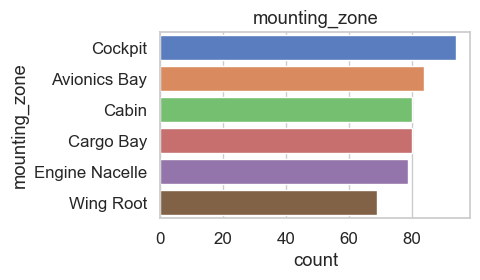

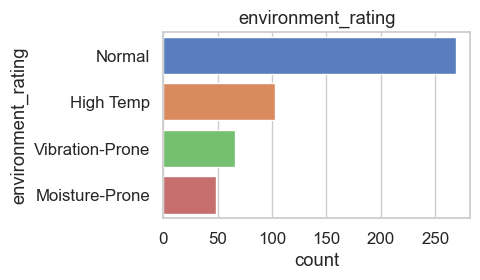

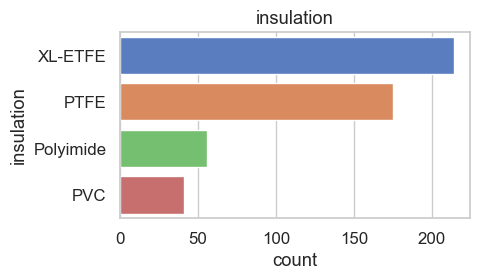

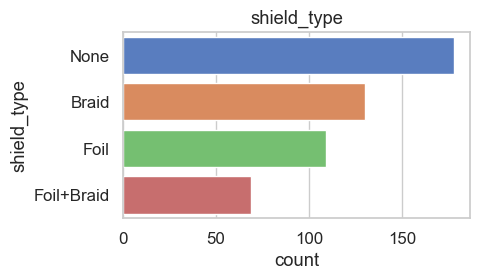

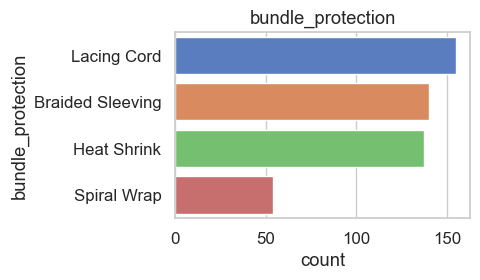

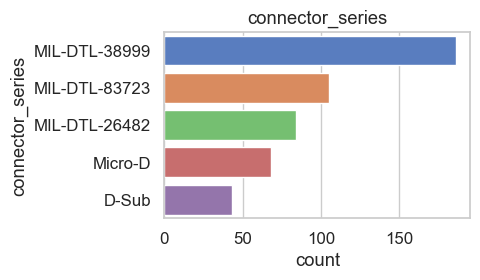

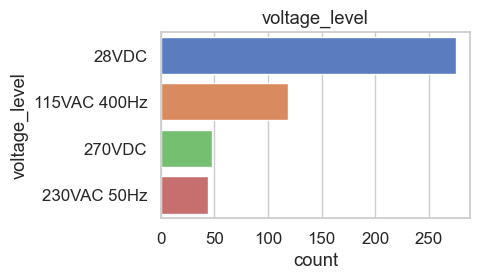

In [7]:
# Categorical distributions
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'project_code']
print("Categorical Columns", cat_cols)
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()
    plt.show()

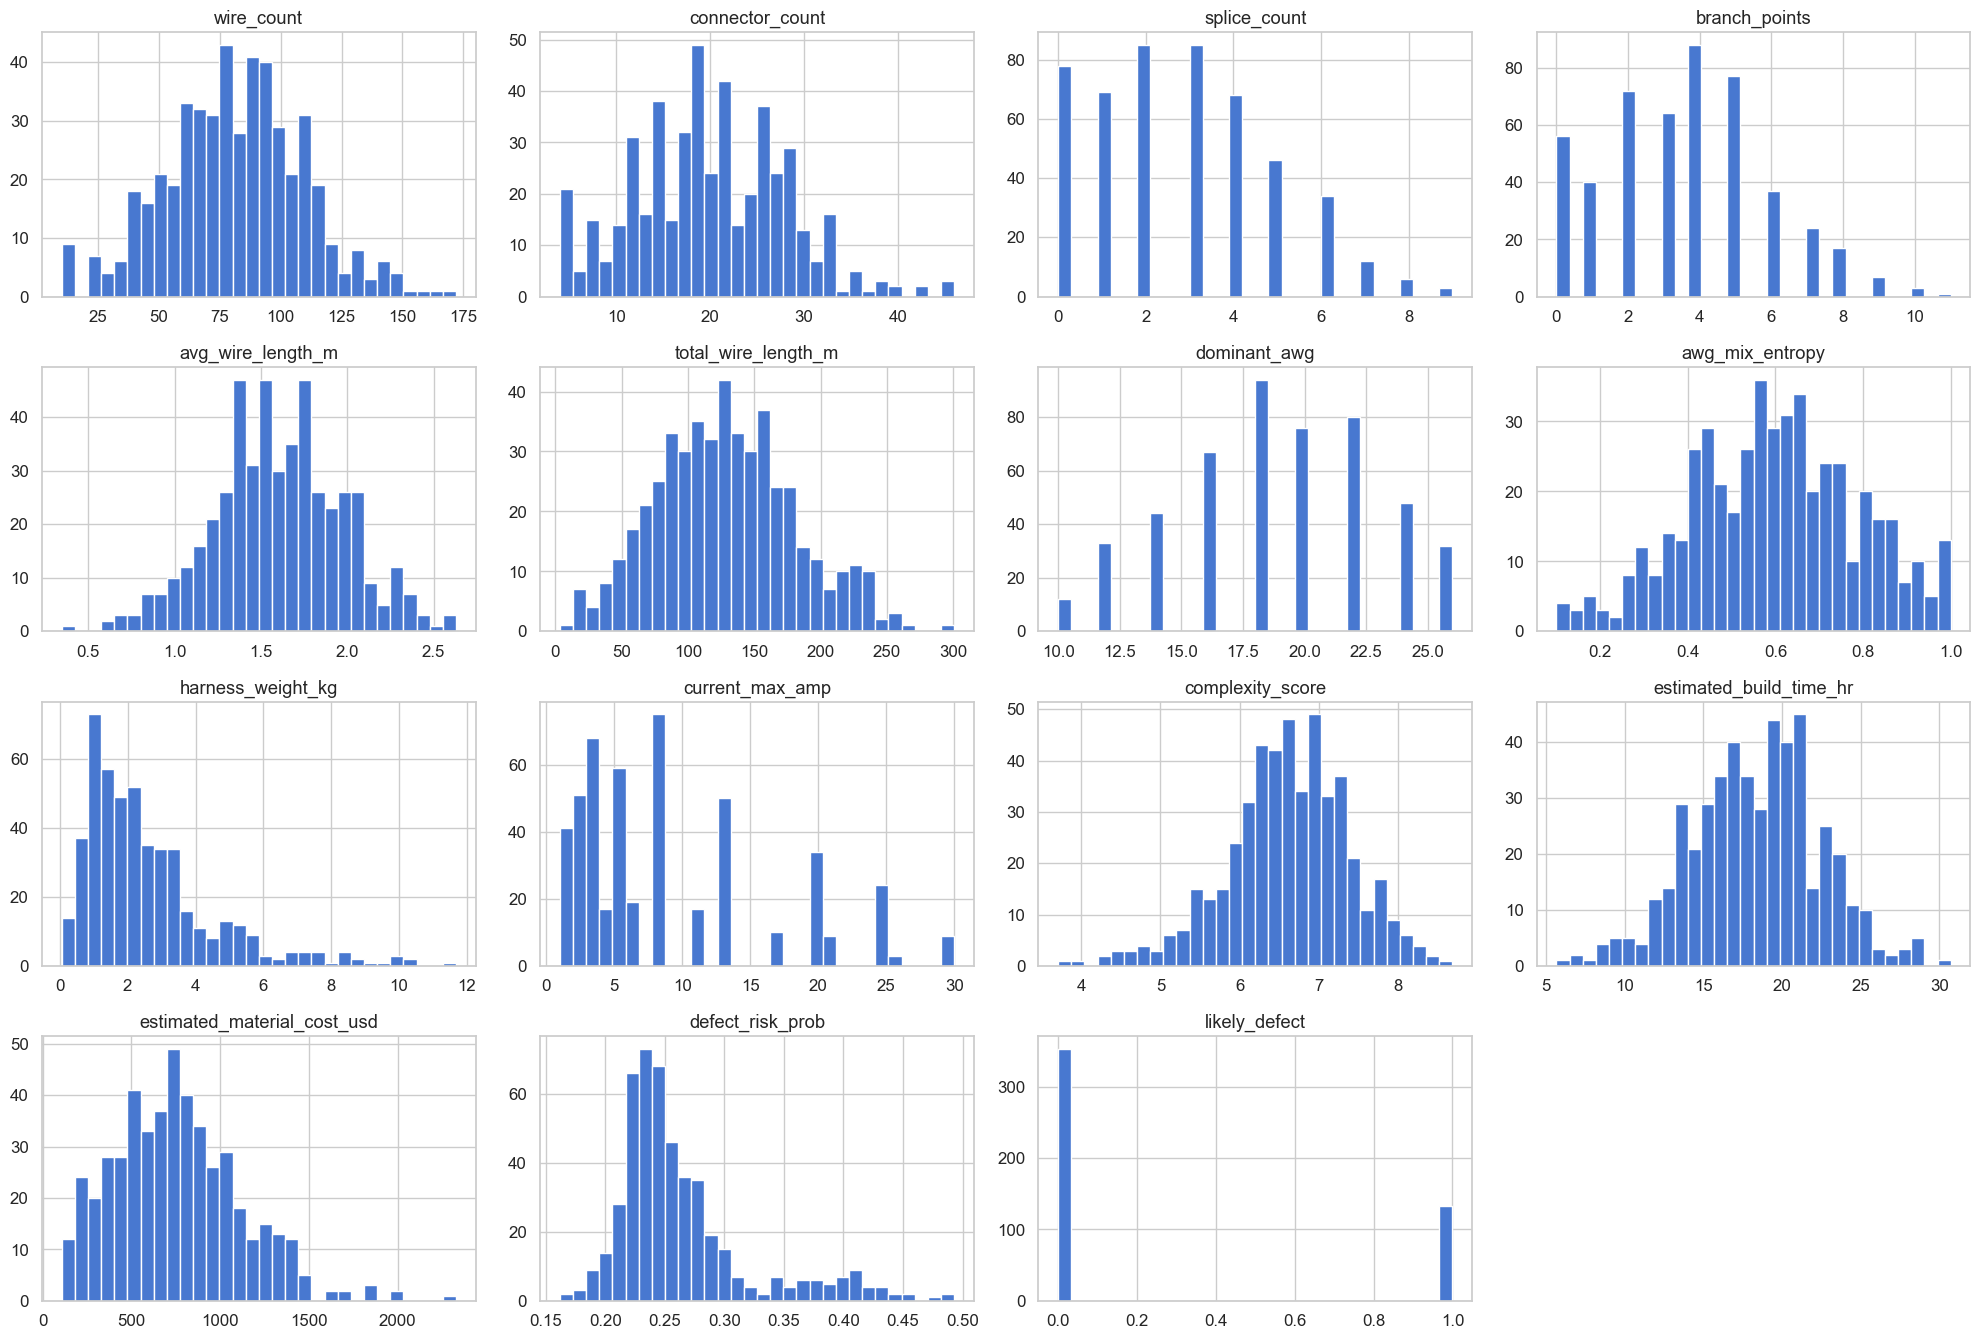

In [8]:
# Numerical distributions
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(bins=30, layout=(6,4), figsize=(20,20))
plt.tight_layout()
plt.show()

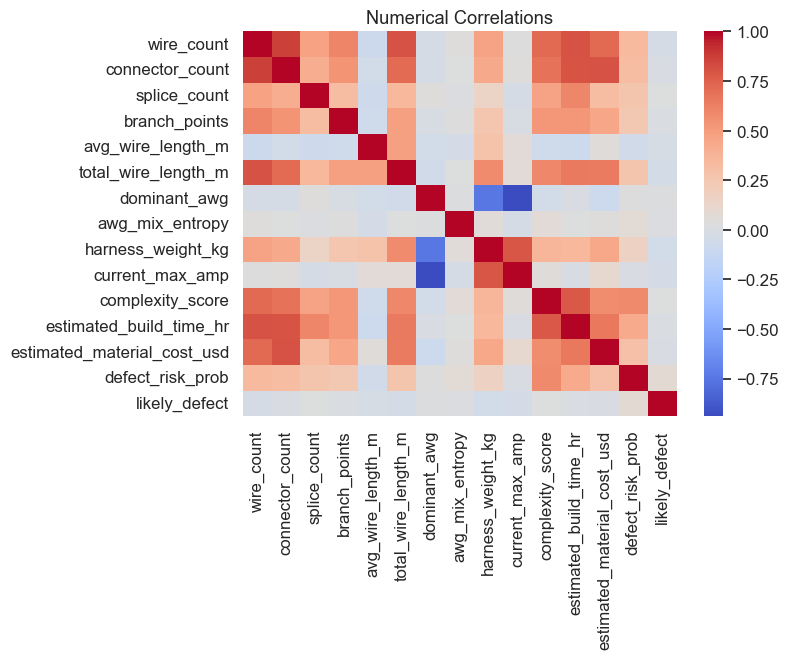

In [9]:
# Correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Numerical Correlations")
plt.show()

In [10]:
# Feature Engineering
df['connectors_per_100m'] = df['connector_count'] / (df['total_wire_length_m'] / 100 + 1e-6)
df['splices_per_100m'] = df['splice_count'] / (df['total_wire_length_m'] / 100 + 1e-6)
df['branch_density'] = df['branch_points'] / (df['wire_count'] + 1e-6)
df['connectors_per_wire'] = df['connector_count'] / (df['wire_count'] + 1e-6)

In [11]:
# Data Preprocessing
def preprocess(df, cat_cols):
    # Drop identifier
    if 'project_code' in df.columns:
        df.drop(['project_code'], axis=1, inplace=True)
    
    # One-Hot Encoding
    encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
    encoder.fit(df[cat_cols])
    df_cat_array = encoder.transform(df[cat_cols])
    df_cat = pd.DataFrame(df_cat_array, columns=encoder.get_feature_names_out(cat_cols), index=df.index)
    
    # Numeric features
    df_num = df.drop(columns=cat_cols)
    df_prepared = pd.concat([df_num.reset_index(drop=True), df_cat.reset_index(drop=True)], axis=1)
    
    # Save encoder + feature order
    joblib.dump(encoder, "encoder.pkl")
    joblib.dump(df_prepared.columns.tolist(), "feature_order.pkl")
    
    print("Preprocessing done!!\nPrepared dataframe shape:", df_prepared.shape)
    return df_prepared

df_prepared = preprocess(df, cat_cols)
df_prepared.head()

Preprocessing done!!
Prepared dataframe shape: (486, 46)


,wire_count,connector_count,splice_count,branch_points,avg_wire_length_m,total_wire_length_m,dominant_awg,awg_mix_entropy,continuity_test,insulation_resistance_test,...,bundle_protection_Heat Shrink,bundle_protection_Lacing Cord,bundle_protection_Spiral Wrap,connector_series_MIL-DTL-26482,connector_series_MIL-DTL-38999,connector_series_MIL-DTL-83723,connector_series_Micro-D,voltage_level_230VAC 50Hz,voltage_level_270VDC,voltage_level_28VDC
0,156,36,6,8,1.360,212.14,14,0.789,True,False,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,102,24,3,5,1.009,102.88,22,0.456,True,True,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,72,13,0,4,1.651,118.86,20,0.350,True,True,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,66,10,5,3,1.735,114.52,18,0.995,True,True,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,84,20,0,4,2.137,179.53,22,0.453,True,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
# Train/Test Split
def split_data(df_prepared):
    X = df_prepared.drop(columns=[
        "estimated_build_time_hr", 
        "estimated_material_cost_usd", 
        "defect_risk_prob", 
        "likely_defect"])
    
    y_class = df_prepared["likely_defect"].astype(int)
    y_time = df_prepared["estimated_build_time_hr"]
    y_cost = df_prepared["estimated_material_cost_usd"]
    
    # Split classification
    X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
        X, y_class, test_size=0.2, random_state=42, stratify=y_class)
    # Split regression
    X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(
        X, y_time, test_size=0.2, random_state=42)
    X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(
        X, y_cost, test_size=0.2, random_state=42)
    
    return (X_train_cls, X_test_cls, y_train_cls, y_test_cls,
            X_train_time, X_test_time, y_train_time, y_test_time,
            X_train_cost, X_test_cost, y_train_cost, y_test_cost)


splits = split_data(df_prepared)
(X_train_cls, X_test_cls, y_train_cls, y_test_cls,
X_train_time, X_test_time, y_train_time, y_test_time,
X_train_cost, X_test_cost, y_train_cost, y_test_cost) = splits

In [13]:
# Regression Models
def train_regression(X_train, y_train, X_test, y_test, model_type="RF", target_name="target"):
    if model_type == "LR":
        model = LinearRegression()
    elif model_type == "RF":
        model = RandomForestRegressor(n_estimators=300, random_state=42)
    elif model_type == "XGB":
        model = XGBRegressor(n_estimators=200, random_state=42, verbosity=0, tree_method='auto')
    else:
        raise ValueError("model_type must be 'LR', 'RF', or 'XGB'")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    print(f"{model_type} Regression ({target_name}) \nMAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}\n")
    joblib.dump(model, f"{model_type}_{target_name}.pkl")
    
    return model, preds

 # Regression
train_regression(X_train_time, y_train_time, X_test_time, y_test_time, "LR", "build_time")
train_regression(X_train_time, y_train_time, X_test_time, y_test_time, "RF", "build_time")
xgb_model, xgb_preds = train_regression(X_train_cost, y_train_cost,X_test_cost, y_test_cost,"XGB","material_cost")
xgb_model

LR Regression (build_time) 
MAE: 1.691, RMSE: 2.096, R2: 0.773

RF Regression (build_time) 
MAE: 1.775, RMSE: 2.183, R2: 0.754

XGB Regression (material_cost) 
MAE: 53.722, RMSE: 87.380, R2: 0.940



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

Original class distribution: {0: 282, 1: 106}
Balanced class distribution: {0: 282, 1: 282}
=== Defect Classification ===
Confusion Matrix:
 [[71  0]
 [25  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85        71
           1       1.00      0.07      0.14        27

    accuracy                           0.74        98
   macro avg       0.87      0.54      0.49        98
weighted avg       0.81      0.74      0.65        98

ROC AUC: 0.47470005216484085


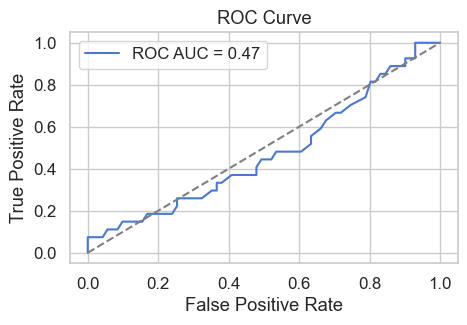

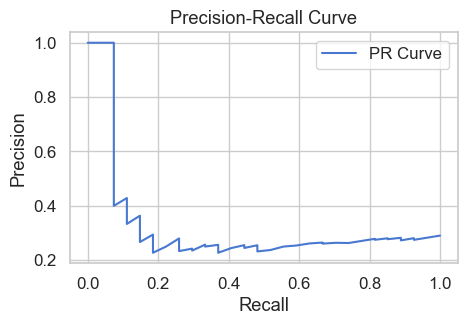

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [14]:
# Classification Model
def train_classification(X_train, y_train, X_test, y_test):
    print("Original class distribution:", y_train.value_counts().to_dict())
    
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)
    print("Balanced class distribution:", y_res.value_counts().to_dict())
    
    clf = RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced",
        random_state=42
    )
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    print("=== Defect Classification ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    
    # Save model
    joblib.dump(clf, "clf_defect.pkl")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,3))
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(y_test, y_prob):.2f}")
    plt.plot([0,1],[0,1],'--',color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
    # PR Curve
    prec, rec, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(5,3))
    plt.plot(rec, prec, label="PR Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()
    
    return clf

# Classification
train_classification(X_train_cls, y_train_cls, X_test_cls, y_test_cls)

In [15]:
# Feature Importance Visualization
def plot_feature_importance(model, X_train, top_n=20, model_name="Model"):
    """
    Plots top N feature importances for tree-based models (RF, XGB)
    """
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        features = X_train.columns
        feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)[:top_n]

        plt.figure(figsize=(6,4))
        sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
        plt.title(f"Top {top_n} Feature Importances ({model_name})")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()
    else:
        print(f"{model_name} does not have feature_importances_ attribute.")

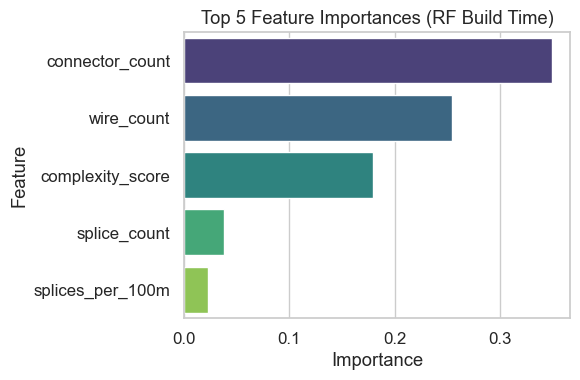

In [16]:
# Build Time Random Forest
rf_build_time_model = joblib.load("RF_build_time.pkl")
plot_feature_importance(rf_build_time_model, X_train_time, top_n=5, model_name="RF Build Time")

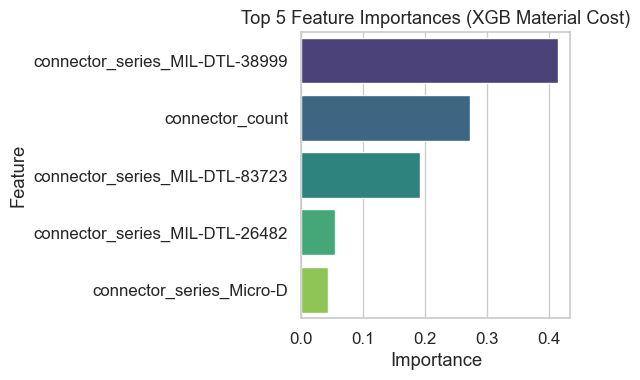

In [17]:
# Material Cost XGBoost
xgb_cost_model = joblib.load("XGB_material_cost.pkl")
plot_feature_importance(xgb_cost_model, X_train_cost, top_n=5, model_name="XGB Material Cost")

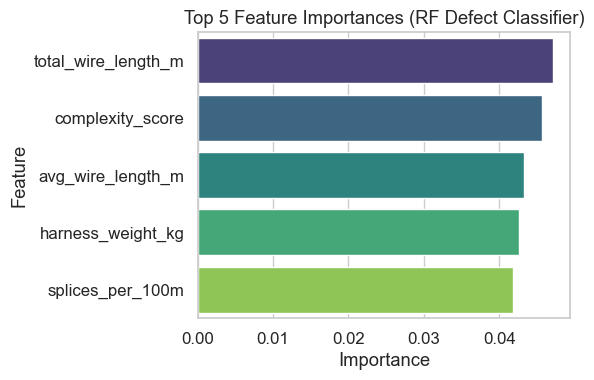

In [18]:
# Defect Classification Random Forest
clf_model = joblib.load("clf_defect.pkl")
plot_feature_importance(clf_model, X_train_cls, top_n=5, model_name="RF Defect Classifier")

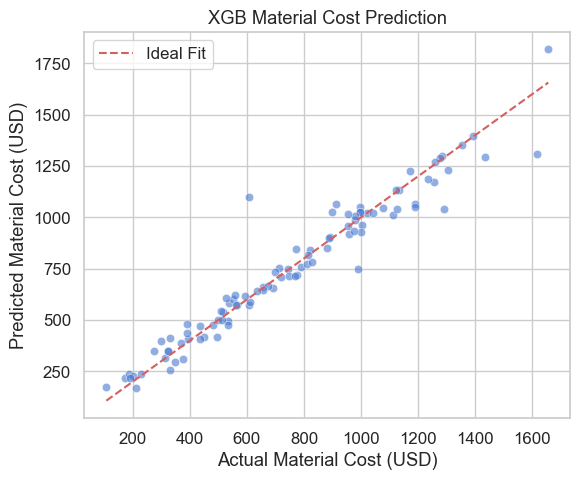

In [19]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test_cost, y=xgb_preds, alpha=0.6)
plt.plot([y_test_cost.min(), y_test_cost.max()], [y_test_cost.min(), y_test_cost.max()], 'r--', label="Ideal Fit")
plt.xlabel("Actual Material Cost (USD)")
plt.ylabel("Predicted Material Cost (USD)")
plt.title("XGB Material Cost Prediction")
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
mae = mean_absolute_error(y_test_cost, xgb_preds)
rmse = np.sqrt(mean_squared_error(y_test_cost, xgb_preds))
r2 = r2_score(y_test_cost, xgb_preds)
print(f"XGB Material Cost\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}")

XGB Material Cost
MAE: 53.72
RMSE: 87.38
R²: 0.94
